In [1]:
# 페이스북(현 메타)에서 만든 시계열 데이터 예측 패키지
!pip install prophet --quiet

In [8]:
!pip install pyupbit --quiet # 업비트에서 제공하는 API (가격, 거래)

In [3]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Python
import pandas as pd
from prophet import Prophet # 패키지에서 클래스를 불러오는것.
import pyupbit
# import FinanceDataReader as fdr

In [11]:
#pyupbit.get_ohlcv() # 200일치의 KRW-BTC 데이터
#pyupbit.get_ohlcv('KRW-ETH') # 200일치의 이더리움 데이터
df = pyupbit.get_ohlcv('KRW-BTC', interval = 'minutes60', count=24*365*3) # 365일 * 24시간치.

In [12]:
# prophet 에 필요한 두가지 변수가 필요함
# ds : 데이터의 시간 값 (index)
# y : 변동되는 대상이 되는 값.(close)
df.tail()

,open,high,low,close,volume,value
2022-11-23 08:00:00,22538000.0,22616000.0,22509000.0,22584000.0,126.649070,2.857764e+09
2022-11-23 09:00:00,22599000.0,22619000.0,22525000.0,22565000.0,210.076677,4.741139e+09
2022-11-23 10:00:00,22566000.0,22650000.0,22530000.0,22647000.0,142.695841,3.224167e+09
2022-11-23 11:00:00,22647000.0,22985000.0,22639000.0,22947000.0,483.346266,1.104806e+10
2022-11-23 12:00:00,22941000.0,22966000.0,22898000.0,22919000.0,66.935895,1.534074e+09


In [13]:
df['ds'] = df.index
df.tail()

,open,high,low,close,volume,value,ds
2022-11-23 08:00:00,22538000.0,22616000.0,22509000.0,22584000.0,126.649070,2.857764e+09,2022-11-23 08:00:00
2022-11-23 09:00:00,22599000.0,22619000.0,22525000.0,22565000.0,210.076677,4.741139e+09,2022-11-23 09:00:00
2022-11-23 10:00:00,22566000.0,22650000.0,22530000.0,22647000.0,142.695841,3.224167e+09,2022-11-23 10:00:00
2022-11-23 11:00:00,22647000.0,22985000.0,22639000.0,22947000.0,483.346266,1.104806e+10,2022-11-23 11:00:00
2022-11-23 12:00:00,22941000.0,22966000.0,22898000.0,22919000.0,66.935895,1.534074e+09,2022-11-23 12:00:00


In [14]:
# shift 밀어내기, 공백은 NULL을 생성해서 넣어준다.
df['y'] = df['close'] / df['close'].shift(1) # 상승률

In [16]:
df.tail()

,open,high,low,close,volume,value,ds,y
2022-11-23 08:00:00,22538000.0,22616000.0,22509000.0,22584000.0,126.649070,2.857764e+09,2022-11-23 08:00:00,1.001952
2022-11-23 09:00:00,22599000.0,22619000.0,22525000.0,22565000.0,210.076677,4.741139e+09,2022-11-23 09:00:00,0.999159
2022-11-23 10:00:00,22566000.0,22650000.0,22530000.0,22647000.0,142.695841,3.224167e+09,2022-11-23 10:00:00,1.003634
2022-11-23 11:00:00,22647000.0,22985000.0,22639000.0,22947000.0,483.346266,1.104806e+10,2022-11-23 11:00:00,1.013247
2022-11-23 12:00:00,22941000.0,22966000.0,22898000.0,22919000.0,66.935895,1.534074e+09,2022-11-23 12:00:00,0.998780


In [17]:
# Python
m = Prophet() # 객체 (모델)
m.fit(df) # ds, y가 학습돼서

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl95e6_mo/b0wjy28w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl95e6_mo/oa_bnvob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3179', 'data', 'file=/tmp/tmpl95e6_mo/b0wjy28w.json', 'init=/tmp/tmpl95e6_mo/oa_bnvob.json', 'output', 'file=/tmp/tmpl95e6_mo/prophet_model0scxjuwe/prophet_model-20221123032225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=24) # 예측하고 싶은 단위
# predict
forecast = m.predict(future)

In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26299,2022-12-13 12:00:00,0.999595,0.990073,1.007788,0.999578,0.999613,-0.000649,-0.000649,-0.000649,-0.000419,...,0.000003,0.000003,0.000003,-0.000232,-0.000232,-0.000232,0.0,0.0,0.0,0.998946
26300,2022-12-14 12:00:00,0.999593,0.990518,1.007921,0.999573,0.999615,-0.000495,-0.000495,-0.000495,-0.000419,...,0.000120,0.000120,0.000120,-0.000196,-0.000196,-0.000196,0.0,0.0,0.0,0.999097
26301,2022-12-15 12:00:00,0.999591,0.990187,1.008262,0.999569,0.999617,-0.000542,-0.000542,-0.000542,-0.000419,...,0.000034,0.000034,0.000034,-0.000156,-0.000156,-0.000156,0.0,0.0,0.0,0.999049
26302,2022-12-16 12:00:00,0.999589,0.989645,1.007127,0.999563,0.999620,-0.000578,-0.000578,-0.000578,-0.000419,...,-0.000046,-0.000046,-0.000046,-0.000113,-0.000113,-0.000113,0.0,0.0,0.0,0.999011
26303,2022-12-17 12:00:00,0.999587,0.990839,1.008087,0.999559,0.999622,-0.000427,-0.000427,-0.000427,-0.000419,...,0.000059,0.000059,0.000059,-0.000067,-0.000067,-0.000067,0.0,0.0,0.0,0.999159


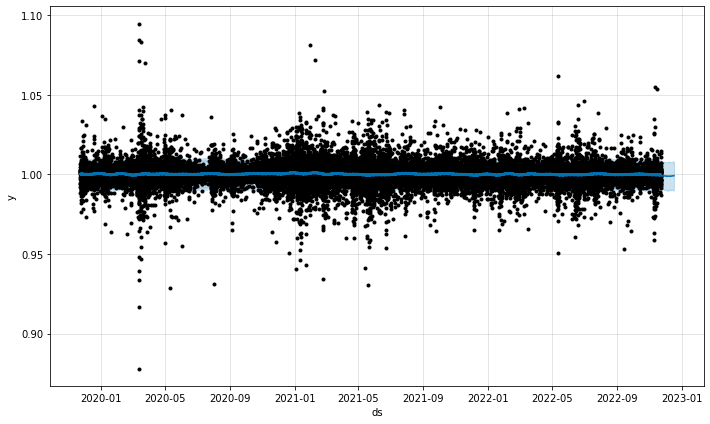

In [21]:
fig1 = m.plot(forecast)

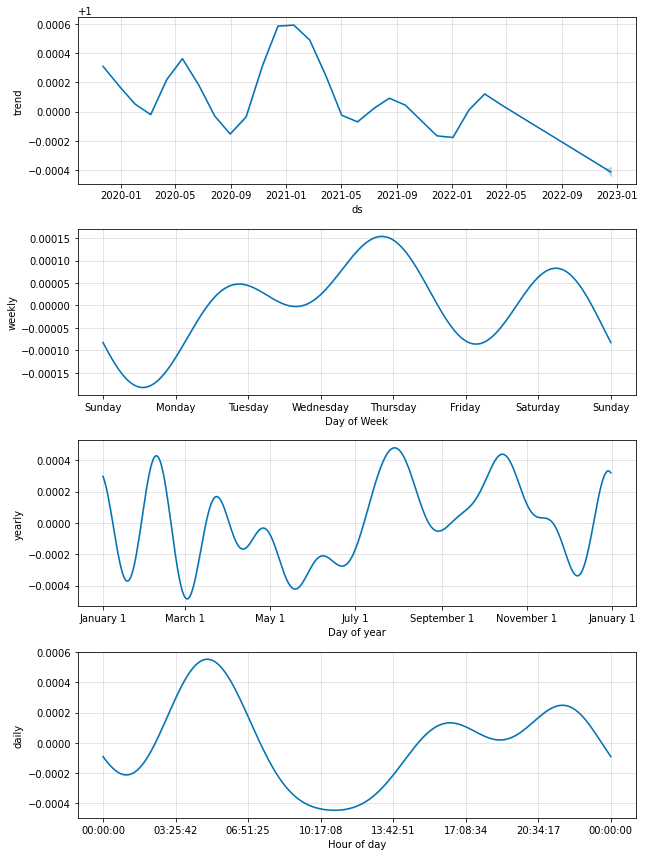

In [22]:
fig2 = m.plot_components(forecast)# 날짜별로 어떤 트렌드가 보여지나.